This is a project to build a supervised machine learning model to predict whether the customer will reserve the rooms in an hotel

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

## Read the train dataframe

In [9]:
data = pd.read_csv('train.csv')
data


id  no_of_adults  no_of_children  no_of_weekend_nights  \
0          0             2               0                     0   
1          1             2               0                     1   
2          2             2               0                     0   
3          3             1               0                     0   
4          4             2               0                     1   
...      ...           ...             ...                   ...   
42095  42095             3               0                     0   
42096  42096             2               0                     0   
42097  42097             2               0                     0   
42098  42098             1               0                     0   
42099  42099             2               0                     1   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                      2                  1                           0   
1                      2                  0                           0   
2                      1                  0                           0   
3                      2                  1                           0   
4                      0                  0                           0   
...                  ...                ...                         ...   
42095                  4                  0                           0   
42096                  3                  0                           0   
42097                  2                  2                           0   
42098                  3                  0                           0   
42099                  1                  0                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                       0          9          2018              1   
1                       0        117          2018              7   
2                       0        315          2018             12   
3                       0         32          2018             12   
4                       0        258          2018             10   
...                   ...        ...           ...            ...   
42095                   1        160          2018             12   
42096                   0         34          2017              9   
42097                   0        292          2018              7   
42098                   0          5          2018             11   
42099                   1         40          2017             10   

       arrival_date  market_segment_type  repeated_guest  \
0                14                    1               1   
1                29                    0               0   
2                 2                    0               0   
3                 1                    1               0   
4                16                    0               0   
...             ...                  ...             ...   
42095            30                    1               0   
42096            23                    0               0   
42097            21                    0               0   
42098             9                    0               0   
42099            26                    0               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                11                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
42095                             0                                     0   
42096                             0                                     0   
42097                             0              

## Summary statistics

In [10]:
data.drop(columns = ['id'], axis = 1, inplace = True)

In [11]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  42100.000000    42100.000000          42100.000000       42100.000000   
mean       1.920713        0.141093              0.884632           2.398005   
std        0.524950        0.450128              0.885693           1.427330   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
count       42100.000000                42100.000000        42100.000000   
mean            0.239192                    0.025249            0.428931   
std             0.587674                    0.156884            0.832605   
min             0.000000                    0.000000            0.000000   
25%             0.000000                    0.000000            0.000000   
50%             0.000000                    0.000000            0.000000   
75%             0.000000                    0.000000            1.000000   
max             3.000000                    1.000000            6.000000   

          lead_time  arrival_year  arrival_month  arrival_date  \
count  42100.000000  42100.000000   42100.000000  42100.000000   
mean     103.888029   2017.856295       7.593539     15.902945   
std       81.069343      0.350795       2.829395      8.888582   
min        0.000000   2017.000000       1.000000      1.000000   
25%       37.000000   2018.000000       6.000000      8.000000   
50%       93.000000   2018.000000       8.000000     16.000000   
75%      155.000000   2018.000000      10.000000     24.000000   
max      443.000000   2018.000000      12.000000     31.000000   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
count         42100.000000    42100.000000                  42100.000000   
mean              0.728504        0.029192                      0.019715   
std               0.633529        0.168347                      0.325837   
min               0.000000        0.000000                      0.000000   
25%               0.000000        0.000000                      0.000000   
50%               1.000000        0.000000                      0.000000   
75%               1.000000        0.000000                      0.000000   
max               4.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          42100.000000        42100.000000   
mean                               0.175772          104.566377   
std                                1.732121           37.139165   
min                                0.000000            0.000000   
25%                                0.000000           80.000000   
50%                                0.000000           99.450000   
75%                                0.000000          123.300000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            42100.000000    42100.000000  
mean                 0.571734        0.392019  
std                  0.775041        0.488207  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

The table above is the summary statistics of the numerical features available in the dataset. which are no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status.

## Exploratory data analysis

In [12]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
data.groupby('arrival_year')['booking_status'].count()

arrival_year
2017     6050
2018    36050
Name: booking_status, dtype: int64

From above we can see that from the available 42100 data,there are 6050 entries for the year 2017 and 36050 for the year 36050 for the year 2018

In [14]:
data.groupby(['arrival_year', 'booking_status'])['booking_status'].count()

arrival_year  booking_status
2017          0                  4964
              1                  1086
2018          0                 20632
              1                 15418
Name: booking_status, dtype: int64

The year 2017 has 1086 booked reservation and 4964 cancelled reservation while the year 2018 has 15418 booked reservation and 20632 cancelled reservation.

In [15]:
data.groupby(['arrival_year', 'booking_status', 'no_of_special_requests'])['no_of_special_requests'].count()

arrival_year  booking_status  no_of_special_requests
2017          0               0                          3498
                              1                          1025
                              2                           339
                              3                            91
                              4                            11
              1               0                           834
                              1                           193
                              2                            58
                              3                             1
2018          0               0                          9346
                              1                          7194
                              2                          3438
                              3                           564
                              4                            89
                              5                             1
              1  

<Axes: xlabel='booking_status', ylabel='count'>

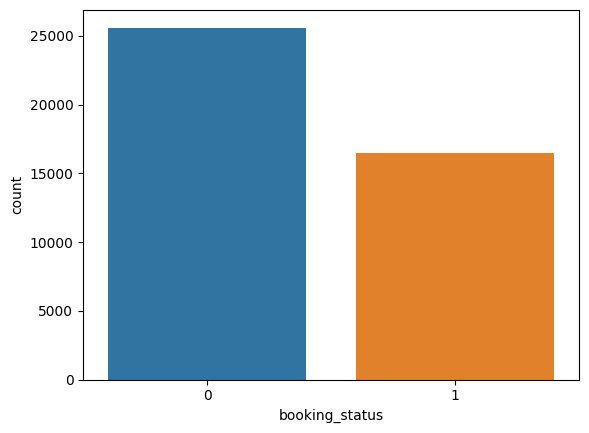

In [16]:
sn.countplot(x = data['booking_status'])

## Feature engineering

data['total_people'] = data['no_of_adults'] + data['no_of_children']

In [17]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     0                  2   
1                 2               0                     1                  2   
2                 2               0                     0                  1   
3                 1               0                     0                  2   
4                 2               0                     1                  0   
...             ...             ...                   ...                ...   
42095             3               0                     0                  4   
42096             2               0                     0                  3   
42097             2               0                     0                  2   
42098             1               0                     0                  3   
42099             2               0                     1                  1   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                      1                           0                   0   
1                      0                           0                   0   
2                      0                           0                   0   
3                      1                           0                   0   
4                      0                           0                   0   
...                  ...                         ...                 ...   
42095                  0                           0                   1   
42096                  0                           0                   0   
42097                  2                           0                   0   
42098                  0                           0                   0   
42099                  0                           0                   1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0              9          2018              1            14   
1            117          2018              7            29   
2            315          2018             12             2   
3             32          2018             12             1   
4            258          2018             10            16   
...          ...           ...            ...           ...   
42095        160          2018             12            30   
42096         34          2017              9            23   
42097        292          2018              7            21   
42098          5          2018             11             9   
42099         40          2017             10            26   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                        1               1                            11   
1                        0               0                             0   
2                        0               0                             0   
3                        1               0                             0   
4                        0               0                             0   
...                    ...             ...                           ...   
42095                    1               0                             0   
42096                    0               0                             0   
42097                    0               0                             0   
42098                    0               0                             0   
42099                    0               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               67.50   
1                                         0               72.25   
2                                         0               52.00   
3                                         0               56.00   
4                                         0              100.00   
...                                     ...                 .

## Feature engineering

In [18]:
data.arrival_year.value_counts()

arrival_year
2018    36050
2017     6050
Name: count, dtype: int64

data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
data

<Axes: >

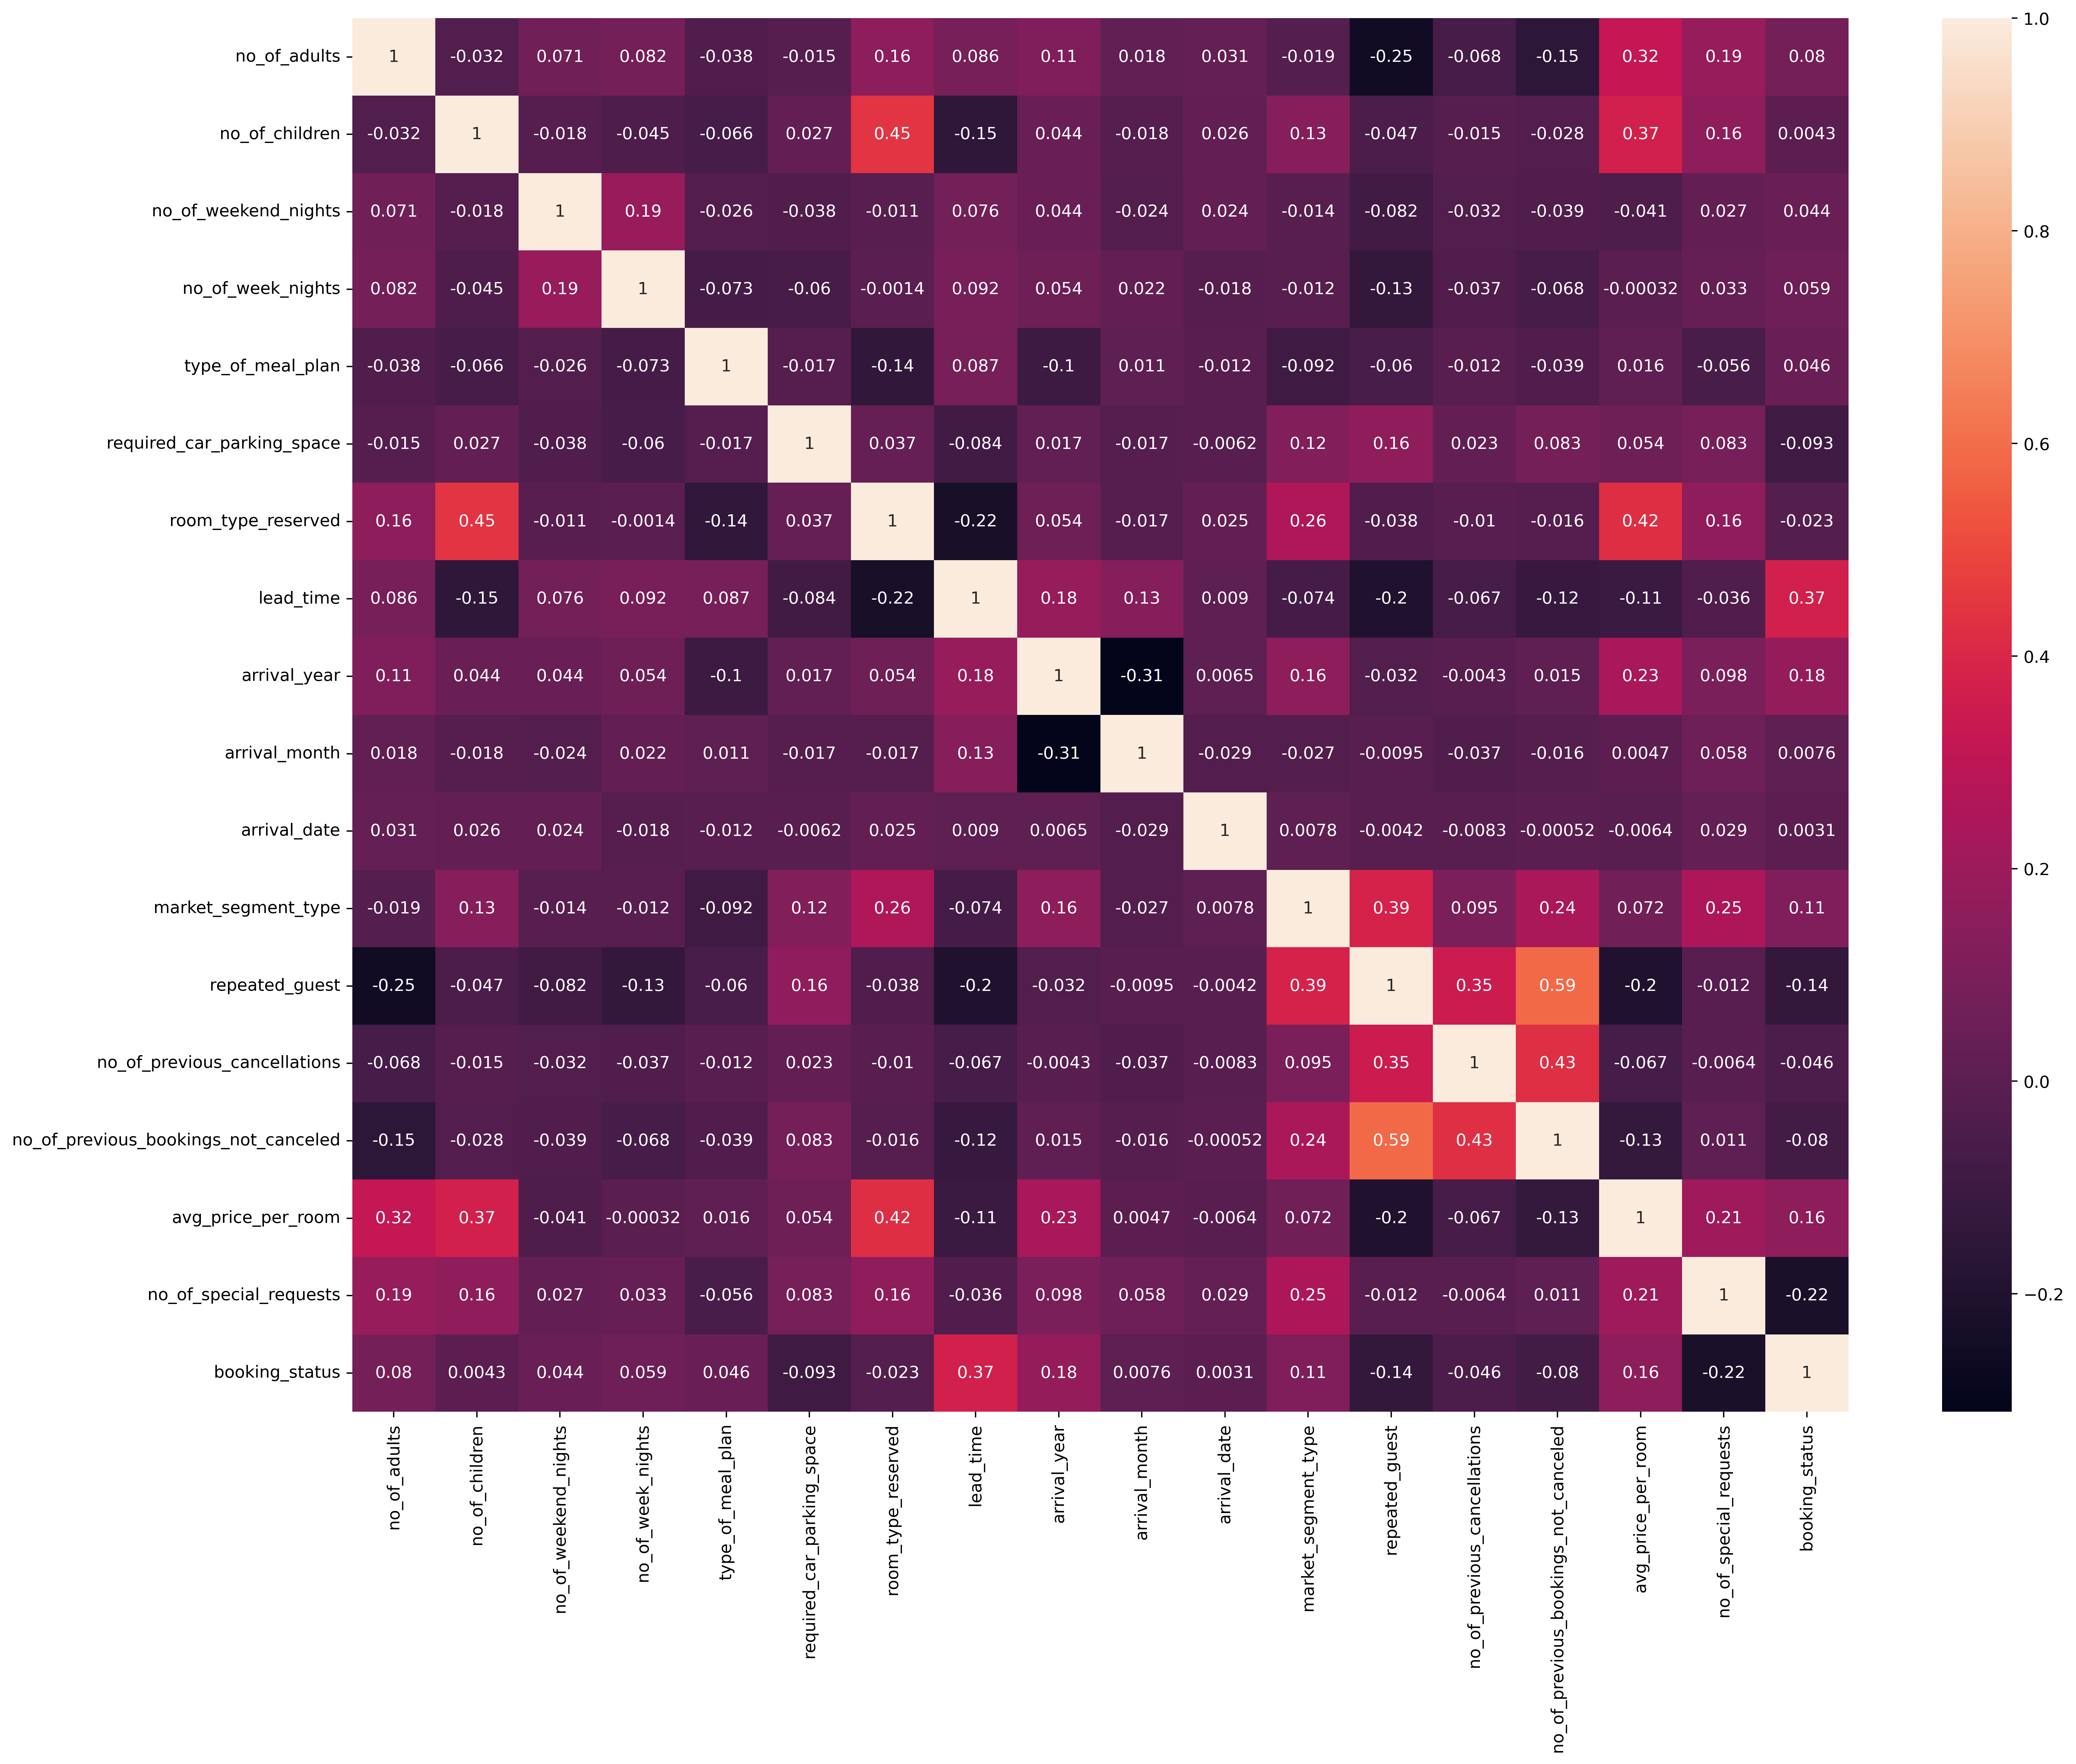

In [19]:
plt.figure(figsize=(20, 15), dpi= 400)
sn.heatmap(data.corr(), annot = True)

In [20]:
for feature in data.columns:
    print(data[feature].value_counts())

no_of_adults
2    30771
1     7089
3     4061
0      167
4       12
Name: count, dtype: int64
no_of_children
0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: count, dtype: int64
no_of_weekend_nights
0    18137
2    12143
1    11389
3      239
4      128
5       46
6       17
7        1
Name: count, dtype: int64
no_of_week_nights
2     12905
3     10286
1      9558
4      4175
5      2573
0      1937
6       237
7       160
8        84
10       82
9        53
11       16
15       11
12        9
13        5
16        4
14        3
17        2
Name: count, dtype: int64
type_of_meal_plan
0    35463
2     3421
1     3210
3        6
Name: count, dtype: int64
required_car_parking_space
0    41037
1     1063
Name: count, dtype: int64
room_type_reserved
0    29853
1     9135
3     1465
2     1131
4      320
5      190
6        6
Name: count, dtype: int64
lead_time
1      846
0      827
2      502
6      498
3      480
      ... 
310      1
325      1
326      1
348      1

In [26]:
data.drop(columns = ['booking_status', 'arrival_year', 'arrival_month', 'arrival_date'] ,axis = 1, inplace= True)

In [27]:
data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     0                  2   
1                 2               0                     1                  2   
2                 2               0                     0                  1   
3                 1               0                     0                  2   
4                 2               0                     1                  0   
...             ...             ...                   ...                ...   
42095             3               0                     0                  4   
42096             2               0                     0                  3   
42097             2               0                     0                  2   
42098             1               0                     0                  3   
42099             2               0                     1                  1   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                      1                           0                   0   
1                      0                           0                   0   
2                      0                           0                   0   
3                      1                           0                   0   
4                      0                           0                   0   
...                  ...                         ...                 ...   
42095                  0                           0                   1   
42096                  0                           0                   0   
42097                  2                           0                   0   
42098                  0                           0                   0   
42099                  0                           0                   1   

       lead_time  market_segment_type  repeated_guest  \
0              9                    1               1   
1            117                    0               0   
2            315                    0               0   
3             32                    1               0   
4            258                    0               0   
...          ...                  ...             ...   
42095        160                    1               0   
42096         34                    0               0   
42097        292                    0               0   
42098          5                    0               0   
42099         40                    0               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                11                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
42095                             0                                     0   
42096                             0                                     0   
42097                             0                                     0   
42098                             0                                     0   
42099                             0                                     0   

       avg_price_per_room  no_of_special_requests  
0                   67.50                       0  
1                   72.25                       0  
2                   52.00                       0  
3                   56.00                       0  
4                  100.00                       0  
...                   ...                     ...  
42095              140.00                       2  
42096              224.67                       0  
42097               96.00                       0  
420

## Data Preprocessing

In [23]:
X = data.drop(columns = ['booking_status'] ,axis = 1)
y = data['booking_status']

In [17]:
scaler = MinMaxScaler()
for feature in X.columns:
    X[feature] = scaler.fit_transform(X[[feature]])

In [18]:
X

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              0.50             0.0              0.000000           0.117647   
1              0.50             0.0              0.142857           0.117647   
2              0.50             0.0              0.000000           0.058824   
3              0.25             0.0              0.000000           0.117647   
4              0.50             0.0              0.142857           0.000000   
...             ...             ...                   ...                ...   
42095          0.75             0.0              0.000000           0.235294   
42096          0.50             0.0              0.000000           0.176471   
42097          0.50             0.0              0.000000           0.117647   
42098          0.25             0.0              0.000000           0.176471   
42099          0.50             0.0              0.142857           0.058824   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0               0.333333                         0.0            0.000000   
1               0.000000                         0.0            0.000000   
2               0.000000                         0.0            0.000000   
3               0.333333                         0.0            0.000000   
4               0.000000                         0.0            0.000000   
...                  ...                         ...                 ...   
42095           0.000000                         0.0            0.166667   
42096           0.000000                         0.0            0.000000   
42097           0.666667                         0.0            0.000000   
42098           0.000000                         0.0            0.000000   
42099           0.000000                         0.0            0.166667   

       lead_time  arrival_year  arrival_month  arrival_date  \
0       0.020316           1.0       0.000000      0.433333   
1       0.264108           1.0       0.545455      0.933333   
2       0.711061           1.0       1.000000      0.033333   
3       0.072235           1.0       1.000000      0.000000   
4       0.582393           1.0       0.818182      0.500000   
...          ...           ...            ...           ...   
42095   0.361174           1.0       1.000000      0.966667   
42096   0.076749           0.0       0.727273      0.733333   
42097   0.659142           1.0       0.545455      0.666667   
42098   0.011287           1.0       0.909091      0.266667   
42099   0.090293           0.0       0.818182      0.833333   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                     0.25             1.0                      0.846154   
1                     0.00             0.0                      0.000000   
2                     0.00             0.0                      0.000000   
3                     0.25             0.0                      0.000000   
4                     0.00             0.0                      0.000000   
...                    ...             ...                           ...   
42095                 0.25             0.0                      0.000000   
42096                 0.00             0.0                      0.000000   
42097                 0.00             0.0                      0.000000   
42098                 0.00             0.0                      0.000000   
42099                 0.00             0.0                      0.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                       0.0            0.125000   
1                                       0.0            0.133796   
2                                       0.0            0.096296   
3                                       0.0            0.103704   
4                                       0.0            0.185185   
...                                     ...                 .

<Axes: >

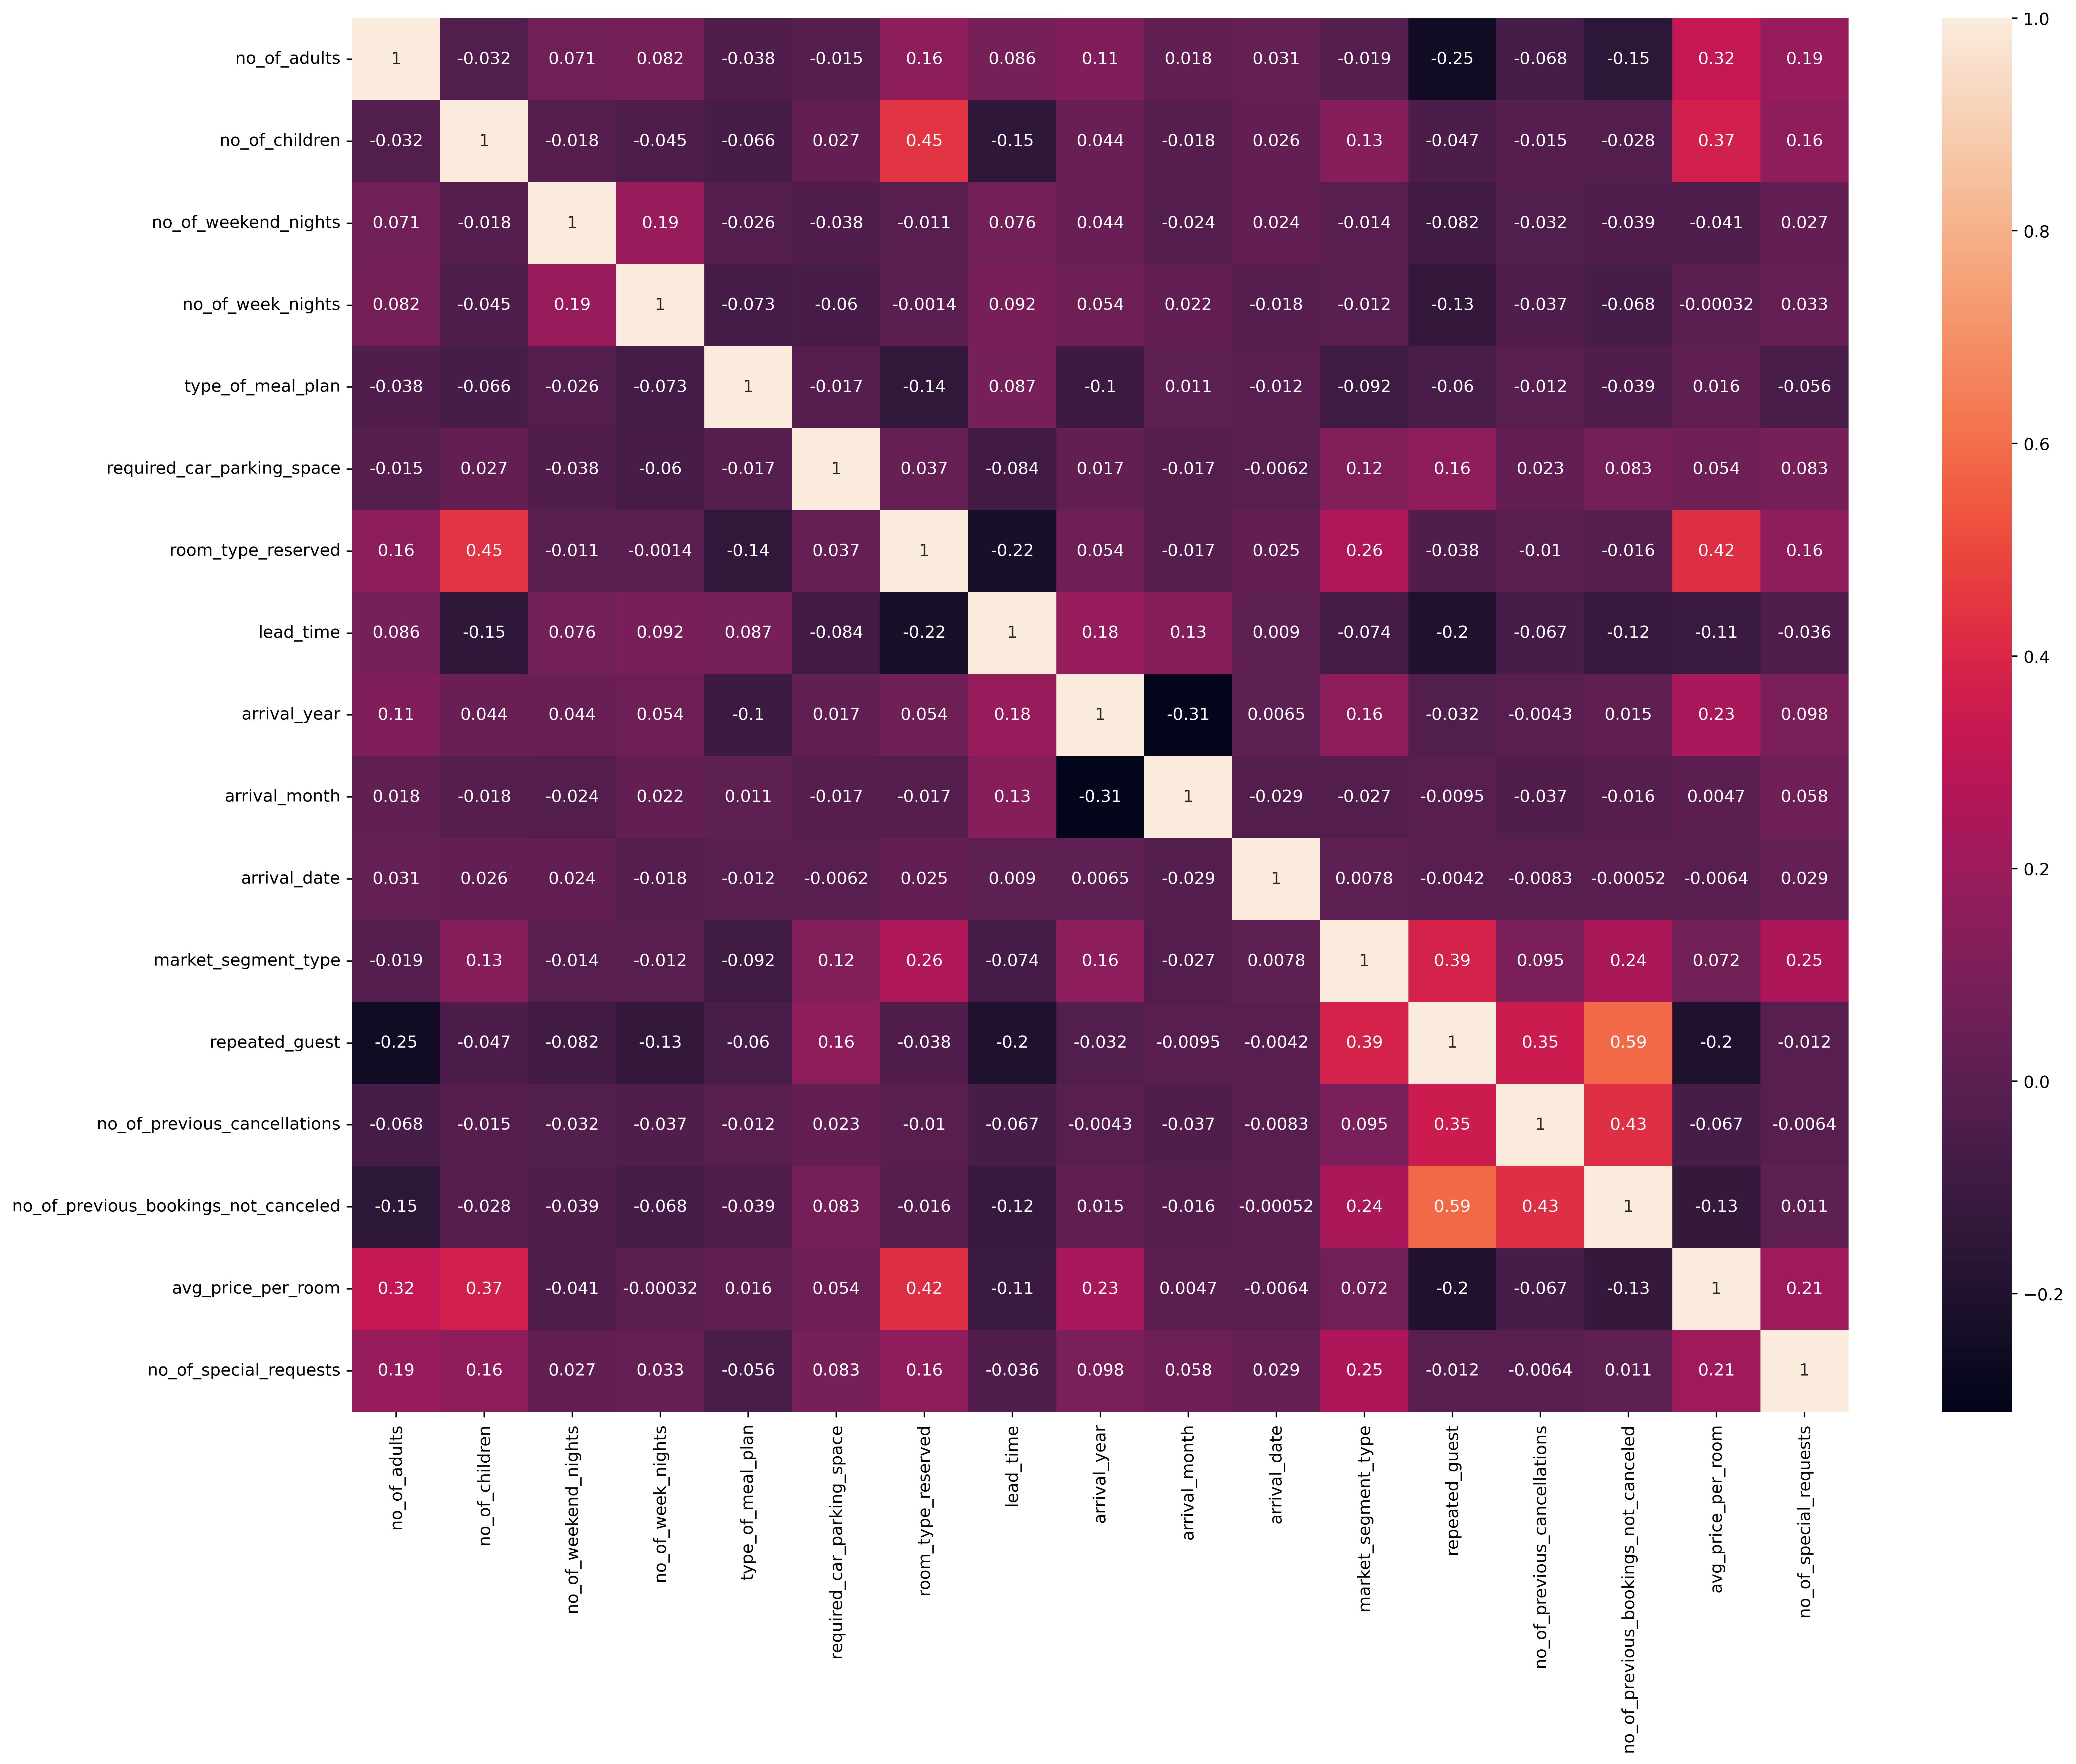

In [19]:
plt.figure(figsize=(20, 15), dpi= 400)
sn.heatmap(X.corr(), annot = True)

## Data Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33680, 17) (8420, 17) (33680,) (8420,)


## Model Building

## Baseline model using decision tree classifier

In [22]:
def model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy score:', accuracy_score(y_test, pred))
    print()
    print('recall score:', recall_score(y_test, pred))
    print()
    print('f1 score:', f1_score(y_test, pred))
    print()
    print('confusion matrix:', confusion_matrix(y_test, pred))
    print()
    print('precision score:', precision_score(y_test, pred))
    print()
    print( classification_report(y_test, pred))

In [23]:
model(DecisionTreeClassifier(random_state= 34))

accuracy score: 0.7344418052256532

recall score: 0.655672009864365

f1 score: 0.6554699537750385

confusion matrix: [[4057 1119]
 [1117 2127]]

precision score: 0.655268022181146

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5176
           1       0.66      0.66      0.66      3244

    accuracy                           0.73      8420
   macro avg       0.72      0.72      0.72      8420
weighted avg       0.73      0.73      0.73      8420



In [24]:
model(LogisticRegression( max_iter= 100, fit_intercept= True))


accuracy score: 0.7646080760095012

recall score: 0.6596794081381011

f1 score: 0.6834877036090705

confusion matrix: [[4298  878]
 [1104 2140]]

precision score: 0.7090788601722995

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5176
           1       0.71      0.66      0.68      3244

    accuracy                           0.76      8420
   macro avg       0.75      0.75      0.75      8420
weighted avg       0.76      0.76      0.76      8420



In [25]:
model(RandomForestClassifier(n_estimators= 400, n_jobs= -1))

accuracy score: 0.8008313539192399

recall score: 0.721023427866831

f1 score: 0.7361132966168371

confusion matrix: [[4404  772]
 [ 905 2339]]

precision score: 0.7518482802957248

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5176
           1       0.75      0.72      0.74      3244

    accuracy                           0.80      8420
   macro avg       0.79      0.79      0.79      8420
weighted avg       0.80      0.80      0.80      8420



In [26]:
model(SVC())

accuracy score: 0.7838479809976246

recall score: 0.6852651048088779

f1 score: 0.7095435684647303

confusion matrix: [[4377  799]
 [1021 2223]]

precision score: 0.7356055592322965

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5176
           1       0.74      0.69      0.71      3244

    accuracy                           0.78      8420
   macro avg       0.77      0.77      0.77      8420
weighted avg       0.78      0.78      0.78      8420



In [27]:
model(SVC(kernel = 'linear', random_state= 4))

accuracy score: 0.7671021377672209

recall score: 0.6735511713933415

f1 score: 0.6902543042173432

confusion matrix: [[4274  902]
 [1059 2185]]

precision score: 0.7078069322967282

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5176
           1       0.71      0.67      0.69      3244

    accuracy                           0.77      8420
   macro avg       0.75      0.75      0.75      8420
weighted avg       0.77      0.77      0.77      8420



In [52]:
chi_best = SelectKBest(score_func=mutual_info_classif, k = 15)
kbest = chi_best.fit_transform(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(kbest, y, test_size=0.1)

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37890, 15) (4210, 15) (37890,) (4210,)


In [55]:
model(DecisionTreeClassifier(random_state= 34))

accuracy score: 0.7399049881235155

recall score: 0.6573468173706127

f1 score: 0.6686838124054463

confusion matrix: [[2010  519]
 [ 576 1105]]

precision score: 0.6804187192118226

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2529
           1       0.68      0.66      0.67      1681

    accuracy                           0.74      4210
   macro avg       0.73      0.73      0.73      4210
weighted avg       0.74      0.74      0.74      4210



In [56]:
model(LogisticRegression( max_iter= 100, fit_intercept= True))


accuracy score: 0.7600950118764845

recall score: 0.6686496133254015

f1 score: 0.6899938612645794

confusion matrix: [[2076  453]
 [ 557 1124]]

precision score: 0.7127457197209892

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2529
           1       0.71      0.67      0.69      1681

    accuracy                           0.76      4210
   macro avg       0.75      0.74      0.75      4210
weighted avg       0.76      0.76      0.76      4210

